# Introdução

As funções devem ser escrirttas em formato numpy. Para isso é possivel excrever normalmente no gemini e pedir pra ele transformar em uma função numpy ou consultar a [documentação da biblioteca](https://numpy.org/doc/2.1/reference/routines.math.html).


[Repositório](https://github.com/ReiJardim/Metodos)


In [7]:
# Importações

import numpy as np
import pandas as pd
import ast

import sympy

Estabelecendo função que será utlizada, o padrão é apenas para definir se será utlizado o mesmo parâmetro para todos  os metodos

In [18]:
padrao = True

x0 = float(input("Digite a primeira estimativa inicial (x0): "))
x1 = float(input("Digite a segunda estimativa inicial (x1): "))
tol = float(input("Digite a tolerância desejada (ex: 1e-6): "))


func_str = input("Digite a função em termos de 'x' (ex: 'x*np.log(x) - 1'): ")
f = lambda x: eval(func_str) # Cria uma função anônima (lambda) a partir da string fornecida pelo usuário

Digite a primeira estimativa inicial (x0): 1
Digite a segunda estimativa inicial (x1): 2
Digite a tolerância desejada (ex: 1e-6): 0.001
Digite a função em termos de 'x' (ex: 'x*np.log(x) - 1'): x*np.log(x) - 1


Calculando a derivada da função

O script abaixo faz a derivada de qualquer função informada, porém ao declarar a função é nescessario trocar os termos "np" por "sympy"

In [12]:
# Define o símbolo 'x'
x = sympy.Symbol('x')

func_str_symlpy = input("Digite a função em termos de 'x' (ex: 'x*sympy.log(x) - 1'): ")
f_deri =  eval(func_str_symlpy)

# Calcula a derivada
derivada = sympy.diff(f_deri, x)

# Imprime a derivada
print(derivada)

Digite a função em termos de 'x' (ex: 'x*sympy.log(x) - 1'): x*sympy.log(x) - 1
log(x) + 1


In [15]:
print(type(func_str_symlpy))

<class 'str'>


# Metodo da Bissecção


  Implementação do método da **bissecção** com cálculo de erro absoluto e relativo.

    Parâmetros:
    - f: função (lambda ou def) para a qual queremos encontrar a raiz.
    - a: limite inferior do intervalo inicial.
    - b: limite superior do intervalo inicial.
    - erro: erro tolerado para a aproximação da raiz.

    Retorna:
    - Uma tabela com os resultados de cada iteração e a raiz aproximada.

In [19]:
import pandas as pd # Importa a biblioteca pandas para criar um DataFrame

def metodo_bissecao(f, a, b, erro):

    # Verifica se o intervalo inicial é válido
    if f(a) * f(b) >= 0:
        raise ValueError("O intervalo inicial não é válido.")

    # VARIÁVEIS
    iteracoes = 0
    resultados = []
    c_anterior = None  # Armazena o valor anterior de c para calcular o erro relativo

    while True:
        iteracoes += 1
        c = (a + b) / 2

        erro_absoluto = abs((b - a))
        erro_relativo = abs((c - c_anterior) / c) if c_anterior is not None and c != 0 else float('inf') # Calcula o erro relativo, tratando divisão por zero

        resultados.append([iteracoes, a, b, c, erro_absoluto, erro_relativo])

        # Sempre atualiza
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c

        # Sempre atualiza
        c_anterior = c

        # Erro tolerado
        if erro_absoluto < erro:
            break

    df = pd.DataFrame(resultados, columns=["Iteração", "a", "b", "c", "Erro Absoluto", "Erro Relativo"])
    return df, c, iteracoes

# EXECUTANDO O CÓDIGO COM A FUNÇÃO

try:
    if padrao == True:
      a = x0
      b = x1
      erro = tol
    else:
      func_str = input("Digite a função em termos de 'x' (ex: 'x*np.log(x) - 1'): ")
      f = lambda x: eval(func_str) # Cria uma função anônima (lambda) a partir da string fornecida pelo usuário

      a = float(input("Digite o limite inferior do intervalo (a): "))
      b = float(input("Digite o limite superior do intervalo (b): "))
      erro = float(input("Digite o erro tolerado: "))



    df_bissecao, raiz_bissecao, num_iteracoes_bissecao = metodo_bissecao(f, a, b, erro)
    print(f"Raiz aproximada: {raiz_bissecao}")
    print(f"Número de iterações: {num_iteracoes_bissecao}")
except ValueError as e:
    print(e)

Raiz aproximada: 1.76318359375
Número de iterações: 11


In [20]:
df_bissecao


,Iteração,a,b,c,Erro Absoluto,Erro Relativo
0,1,1.000000,2.000000,1.500000,1.000000,inf
1,2,1.500000,2.000000,1.750000,0.500000,0.142857
2,3,1.750000,2.000000,1.875000,0.250000,0.066667
3,4,1.750000,1.875000,1.812500,0.125000,0.034483
4,5,1.750000,1.812500,1.781250,0.062500,0.017544
5,6,1.750000,1.781250,1.765625,0.031250,0.008850
6,7,1.750000,1.765625,1.757812,0.015625,0.004444
7,8,1.757812,1.765625,1.761719,0.007812,0.002217
8,9,1.761719,1.765625,1.763672,0.003906,0.001107
9,10,1.761719,1.763672,1.762695,0.001953,0.000554


# Metodo Secante

Implementação do método da secante para encontrar a raiz de uma função.

    Parâmetros:
    - f: função (lambda ou def) para a qual queremos encontrar a raiz.
    - x0: primeira estimativa inicial.
    - x1: segunda estimativa inicial.
    - tol: tolerância para o critério de parada (erro absoluto).
    - max_iter: número máximo de iterações permitidas.

    Retorna:
    - Aproximação da raiz (arredondada para 4 casas decimais) e o número de iterações executadas.

In [22]:
def metodo_secante(f, x0, x1, tol=1e-6, max_iter=100):

    resultados = []  # Lista para armazenar os resultados para o DataFrame

    for i in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        if f_x1 - f_x0 == 0:  # Evita divisão por zero
            raise ValueError("Divisão por zero no cálculo do método da secante.")

        x2 = x1 - (f_x1 * (x1 - x0)) / (f_x1 - f_x0)

        resultados.append([i + 1, x0, x1, x2, f(x2)])  # Adiciona os resultados

        # Verifica o critério de parada
        if abs(x2 - x1) < tol:
            df = pd.DataFrame(resultados, columns=["Iteração", "x0", "x1", "x2", "f(x2)"])  # Cria o DataFrame
            return df, round(x2, 4), i + 1  # Arredonda a raiz para 4 casas decimais

        # Atualiza os valores para a próxima iteração
        x0, x1 = x1, x2

    df = pd.DataFrame(resultados, columns=["Iteração", "x0", "x1", "x2", "f(x2)"])  # Cria o DataFrame mesmo se não convergir
    raise Exception("O método da secante não convergiu após o número máximo de iterações.")


try:
    if padrao == True:
      pass

    else:
      func_str = input("Digite a função em termos de 'x' (ex: 'x*np.log(x) - 1'): ")
      f = lambda x: eval(func_str) # Cria uma função anônima (lambda) a partir da string fornecida pelo usuário

      x0 = float(input("Digite a primeira estimativa inicial (x0): "))
      x1 = float(input("Digite a segunda estimativa inicial (x1): "))
      tol = float(input("Digite a tolerância desejada (ex: 1e-6): "))

    # Chamando o método da secante
    df_secante, raiz_secante, num_iteracoes_secante = metodo_secante(f, x0, x1, tol)
    print(f"Raiz aproximada (arredondada para 4 casas): {raiz_secante}")
    print(f"Número de iterações: {num_iteracoes_secante}")
except (ValueError, SyntaxError, NameError) as e:
    print(f"Erro: {e}")
    print("Por favor, insira uma função e estimativas iniciais válidas.")

Raiz aproximada (arredondada para 4 casas): 1.7632
Número de iterações: 4


In [24]:
df_secante


,Iteração,x0,x1,x2,f(x2)
0,1,1.000000,2.000000,1.721348,-6.512338e-02
1,2,2.000000,1.721348,1.761547,-2.625362e-03
2,3,1.721348,1.761547,1.763236,2.022561e-05
3,4,1.761547,1.763236,1.763223,-6.136693e-09


# Metodo de Newton

Biblioteca que calcula a derivada de uma função

In [6]:
# Define o símbolo 'x'
x = sympy.Symbol('x')

# Define a função
f = x * sympy.log(x) - 1

# Calcula a derivada
derivada = sympy.diff(f, x)

# Imprime a derivada
print(derivada)

log(x) + 1


Método de Newton-Raphson para encontrar a raiz de uma função.

    Parâmetros:
    - f: função para a qual queremos encontrar a raiz.
    - df: derivada da função f.
    - x0: estimativa inicial.
    - tol: erro tolerado para a aproximação da raiz.

    Retorna:
    - Aproximação da raiz e o número de iterações realizadas.

In [27]:
def newton_raphson(f, df, x0, tol):

    iteracoes = 0
    resultados = []

    while True:
        iteracoes += 1
        fx = f(x0)
        dfx = df(x0)

        if dfx == 0:
            raise ValueError("Derivada zero encontrada. O método falhou.")

        x1 = x0 - fx / dfx
        resultados.append([iteracoes, x0, x1, fx, dfx])

        if abs(x1 - x0) <= tol:
            df_resultados = pd.DataFrame(resultados, columns=["Iteração", "x0", "x1", "f(x0)", "f'(x0)"])
            return df_resultados, x1, iteracoes

        x0 = x1

try:

    if padrao == True:

      deriv_str = input(f"Digite a derivada ({derivada}) no padrão np (ex: '-np.exp(-x) + np.sin(x)'): ")
      deri = lambda x: eval(deriv_str)
    else :

      # Obtém a função do usuário
      func_str = input("Digite a função em termos de 'x' (ex: 'np.exp(-x) - np.cos(x)'): ")
      f = lambda x: eval(func_str)  # Avalia a string para criar uma função

      deriv_str = input("Digite a derivada da função (ex: '-np.exp(-x) + np.sin(x)'): ")
      df = lambda x: eval(deriv_str)

      x0 = float(input("Digite a estimativa inicial (x0): "))
      tol = float(input("Digite o erro tolerado (ex: 0.001): "))

    df_nr, raiz_nr, num_iteracoes_nr = newton_raphson(f, deri, x0, tol)

    print(f"Raiz aproximada: {raiz_nr}")
    print(f"Número de iterações: {num_iteracoes_nr}")

except (ValueError, SyntaxError, NameError, TypeError) as e:  # Inclui TypeError
    print(f"Erro: {e}")
    print("Por favor, insira uma função, derivada e estimativa inicial válidas.")

Digite a derivada (log(x) + 1) no padrão np (ex: '-np.exp(-x) + np.sin(x)'): np.log(x) + 1
Raiz aproximada: 1.7632228343842757
Número de iterações: 4


In [28]:
df_nr


,Iteração,x0,x1,f(x0),f'(x0)
0,1,1.000000,2.000000,-1.000000,1.000000
1,2,2.000000,1.771848,0.386294,1.693147
2,3,1.771848,1.763236,0.013538,1.572023
3,4,1.763236,1.763223,0.000021,1.567151


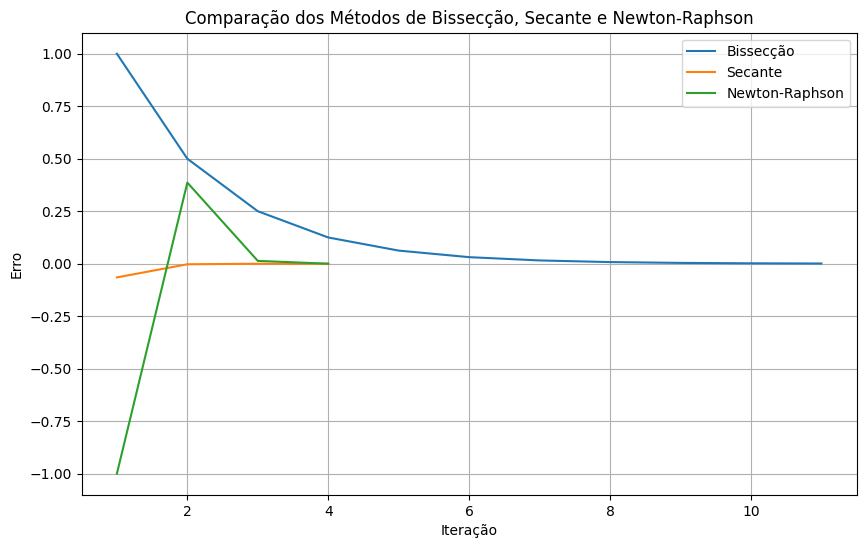

In [29]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_bissecao["Iteração"], df_bissecao["Erro Absoluto"], label="Bissecção")
plt.plot(df_secante["Iteração"], df_secante["f(x2)"], label="Secante")
plt.plot(df_nr["Iteração"], df_nr["f(x0)"], label="Newton-Raphson")
plt.xlabel("Iteração")
plt.ylabel("Erro")
plt.title("Comparação dos Métodos de Bissecção, Secante e Newton-Raphson")
plt.legend()
plt.grid(True)
plt.show()

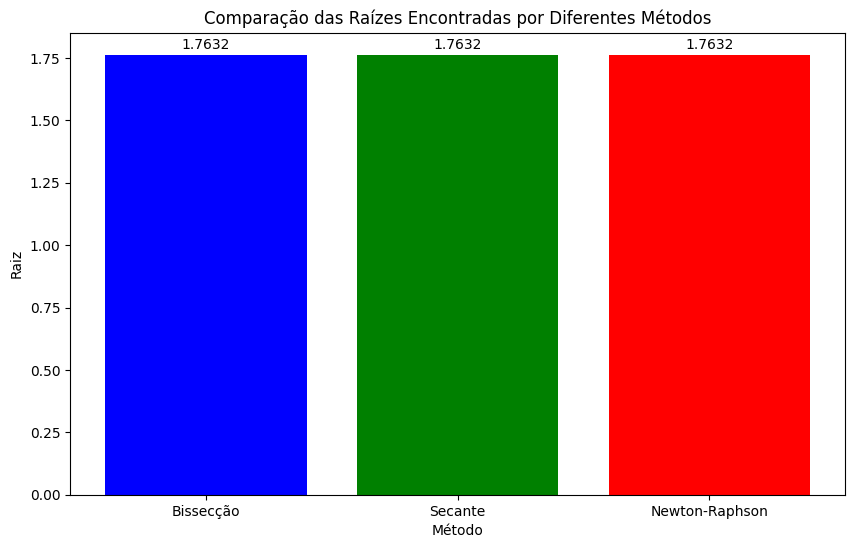

In [34]:
# Dados das raízes e métodos
metodos = ['Bissecção', 'Secante', 'Newton-Raphson']
raizes = [raiz_bissecao, raiz_secante, raiz_nr]

# Criar o gráfico de colunas
plt.figure(figsize=(10, 6))
plt.bar(metodos, raizes, color=['blue', 'green', 'red'])
plt.xlabel("Método")
plt.ylabel("Raiz")
plt.title("Comparação das Raízes Encontradas por Diferentes Métodos")

# Adicionar legendas com os valores das raízes
for i, raiz in enumerate(raizes):
    plt.text(i, raiz + 0.01, f"{raiz:.4f}", ha='center', va='bottom')

plt.show()